# Travaux Pratiques 2: Méthodes statistiques pour la segmentation d’images

## Partie 3:  La segmentation non supervisée ou comment segmenter une image réelle

Dans la partie précédente, la segmentation est rendue possible par la possibilité d’estimer, d’une part les paramètres du modèle, (p1,p2), grâce à la connaissance de l’image de classes et par le fait que l’on connaisse les paramètres du bruit, (m1,sig1,m2,sig2), puisqu’ils ont servi au bruitage de l’image de synthèse à segmenter...

Lorsque on segmente une image réelle, ce qui est l’objectif de ce travail, ces paramètres sont inconnus. Comme on ne dispose pas de la vérité terrain (c’est ce qu’on cherche à estimer), il faut estimer les paramètres du modèle ainsi que ceux du bruit avant de faire la segmentation. Pour cela il va falloir estimer la loi du couple $(X, Y)$ ce qui serait un travail classique d’inférence statistique si l’on disposait d’une observation $(x, y)$, du couple $(X, Y)$ :

- $p_i = \frac{1}{|S|}\underset{s\in S}{\sum}\mathbb{1}_{[x_s=\omega_i]}$
- $m_i = \frac{1}{\underset{s\in S}{\sum}\mathbb{1}_{[x_s=\omega_i]}}\underset{s\in S}{\sum}y_s\mathbb{1}_{[x_s=\omega_i]}$
-$\sigma^2_i = \frac{1}{\underset{s\in S}{\sum}(\mathbb{1}_{[x_s=\omega_i]})-1}\underset{s\in S}{\sum}\mathbb{1}_{[x_s=\omega_i]}(y_s-m_i)^2$ (on divise par $\underset{s\in S}{\sum}(\mathbb{1}_{[x_s=\omega_i]})-1$ afin d'obtenir un estimateur non biaisé de $\sigma^2_i$)

**La difficulté est, qu’ici, on n’observe que Y = y.**

Il existe des méthodes permettant l’estimation des paramètres dans le cas de données manquantes. On s’intéresse à deux méthodes bien connues **EM** et **SEM**

Le paramètre dans l'algorithme EM est $\theta=(p_1,p_2,m_1,m_2,\sigma_1^2,\sigma_2^2)$

A chaque itération de notre algorithme EM, on calcule $\theta^{(t+1)}$ de la manière suivante:
$\theta^{(t+1)} = \mathbb{E}_{\mathbb{P}(x|y;\theta^{(t)})}[log(\mathbb{P}(x,y))]$

Explicitons le calcul de la loi jointe:
$$
\begin{array}{r l}
\mathbb{P}(x,y) & =  \underset{n}{\prod}\mathbb{P}(x_n)\mathbb{P}(y_n|x_n) \\
& = \underset{n}{\prod}(p_1 f_1(y_n;m_1,\sigma_1^2))^{\mathbb{1}_{\{x_n=\omega_1\}}} (p_2 f_2(y_n;m_2,\sigma_2^2))^{\mathbb{1}_{\{x_n=\omega_2\}}}
\end{array}
$$

ce qui nous donne:
$$
\begin{array}{r l}
\mathbb{E}_{\mathbb{P}(x|y;\theta^{(t)})}[log(\mathbb{P}(x,y))] & =  \mathbb{E}_{\mathbb{P}(x|y;\theta^{(t)})}[\underset{n}{\sum}[\mathbb{1}_{\{x_n=\omega_1\}}(log(p_1)+log(f_1(y_n;m_1,\sigma_1^2)))+\mathbb{1}_{\{x_n=\omega_2\}}(log(p_2)+log(f_2(y_n;m_2,\sigma_2^2)))]] \\
& = \underset{n}{\sum}[\mathbb{E}_{\mathbb{P}(x|y;\theta^{(t)})}[\mathbb{1}_{\{x_n=\omega_1\}}](log(p_1)+log(f_1(y_n;m_1,\sigma_1^2)))+\mathbb{E}_{\mathbb{P}(x|y;\theta^{(t)})}[\mathbb{1}_{\{x_n=\omega_2\}}](log(p_2)+log(f_2(y_n;m_2,\sigma_2^2)))] \\
& = \underset{n}{\sum}[\mathbb{P}(x_n=\omega_1|y_n;\theta^{(t)})(log(p_1)+log(f_1(y_n;m_1,\sigma_1^2)))+\mathbb{P}(x_n=\omega_2|y_n;\theta^{(t)})(log(1 - p_1)+log(f_2(y_n;m_2,\sigma_2^2)))]
\end{array}
$$

Nous avons désormais l'expression de l'espérance pour tout $\theta^{(t)}$. Notons que j'ai remplacé, ici, $p_2$ par $1-p_1$ pour éviter de devoir dériver sous contraintes et ainsi engendrer des difficultés supplémentaires. 

Nous avons calculer l'espèrance, il reste alors à dériver par rapport à chaque paramètre de $\theta^{(t)}$ et à annuler ces dérivées. Je détaillerai le calcul pour la dérivée par rapport à $p_1$:

$\frac{\partial\mathbb{E}_{\mathbb{P}(x|y;\theta^{(t)})}[log(\mathbb{P}(x,y))]}{\partial p_1}  = \underset{n}{\sum} \mathbb{P}(x_n=\omega_1|y_n;\theta^{(t)})\frac{1}{p_1} - \underset{n}{\sum} \mathbb{P}(x_n=\omega_2|y_n;\theta^{(t)})\frac{1}{1 - p_1}$

d'où, 
$$
\begin{array}{rl}
\frac{\partial\mathbb{E}_{\mathbb{P}(x|y;\theta^{(t)})}[log(\mathbb{P}(x,y))]}{\partial p_1}=0 & \Leftrightarrow \frac{1}{p_1}\underset{n}{\sum} \mathbb{P}(x_n=\omega_1|y_n;\theta^{(t)}) = \frac{1}{1 - p_1}\underset{n}{\sum} \mathbb{P}(x_n=\omega_2|y_n;\theta^{(t)})\\
& \Leftrightarrow p_1 = \frac{\underset{n}{\sum}(\mathbb{P}(x_n=\omega_1|y_n;\theta^{(t)})}{\underset{n}{\sum}[\mathbb{P}(x_n=\omega_1|y_n;\theta^{(t)})+\mathbb{P}(x_n=\omega_2|y_n;\theta^{(t)})]}\\
& \Leftrightarrow p_1^{(t+1)} = \frac{1}{n}\underset{n}{\sum}\mathbb{P}(x_n=\omega_1|y_n;\theta^{(t)})  \quad \text{Ouf, ça nous rassure...}
\end{array}
$$

De la même manière, on trouve: 
- $p_2^{(t+1)} = 1 - p_1^{(t+1)}= \frac{1}{n}\underset{n}{\sum}\mathbb{P}(x_n=\omega_2|y_n;\theta^{(t)})$
- $m_1^{(t+1)} = \frac{\underset{n}{\sum}y_n\mathbb{P}(x_n=\omega_1|y_n;\theta^{(t)})}{\underset{n}{\sum}\mathbb{P}(x_n=\omega_1|y_n;\theta^{(t)})}$
- $m_2^{(t+1)} = \frac{\underset{n}{\sum}y_n\mathbb{P}(x_n=\omega_2|y_n;\theta^{(t)})}{\underset{n}{\sum}\mathbb{P}(x_n=\omega_2|y_n;\theta^{(t)})}$
- ${\sigma_1^2}^{(t+1)} = \frac{\underset{n}{\sum}\mathbb{P}(x_n=\omega_1|y_n;\theta^{(t)})(y_n-m_1^{(t+1)})^2}{\underset{n}{\sum}\mathbb{P}(x_n=\omega_1|y_n;\theta^{(t)})}$
- ${\sigma_2^2}^{(t+1)} = \frac{\underset{n}{\sum}\mathbb{P}(x_n=\omega_2|y_n;\theta^{(t)})(y_n-m_2^{(t+1)})^2}{\underset{n}{\sum}\mathbb{P}(x_n=\omega_2|y_n;\theta^{(t)})}$

Les défauts de l'algorithme EM sont les mêmes que tous les algorithmes d'optimisation alternée: 
- Convergence vers un minimum local 
- Dépend de l'initialisation

**Nous allons mettre en évidence les défauts de cet algorithme dans la suite de ce TP.**


In [399]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image
import cv2 as cv
from sklearn.cluster import KMeans
from scipy.integrate import quad 
import pandas as pd
import seaborn as sns

In [4]:
def lit_image(chemin_image):
    '''
        Cette fonction nous renvoie:
            - la matrice de l'image en noir et blanc
            - son nombre m de lignes
            - son nombre n de colonnes
    '''
    img=cv.cvtColor(cv.imread(chemin_image),cv.COLOR_BGR2GRAY)
    return img,int(img.shape[0]),int(img.shape[1])

In [5]:
def affiche_image(titre,image):
    '''
        Comme son nom l'indique, cette fonction nous affiche l'image ainsi que son titre.
    '''
    plt.imshow(image, cmap='gray')
    plt.title(titre)
    plt.axis('off')
    plt.show()

In [6]:
def identif_classes(X):
    counts, _ = np.histogram(X, bins=int(X.max()+1), range=(0,int(X.max())))
    return np.nonzero(counts)[0]

In [7]:
def bruit_gauss(X,m,n,cl1,cl2,m1,sig1,m2,sig2):
    Y = np.zeros((m,n))
    Y[X==cl1]=sig1*np.random.randn(Y[X==cl1].shape[0])+m1
    Y[X==cl2]=sig2*np.random.randn(Y[X==cl2].shape[0])+m2
    return Y

In [8]:
def taux_erreur(A,B,m,n):
    """
        Retourne le taux d'erreur entre deux images A et B.
    """
    return np.count_nonzero(A!=B)/(m*n)

In [9]:
def calc_probaprio(X,m,n,cl1,cl2):
    return X[X==cl1].shape[0]/(m*n), X[X==cl2].shape[0]/(m*n)

In [10]:
def MPM_Gauss(Y,cl1,cl2,p1,p2,m1,sig1,m2,sig2):
    """
    Cette fonction permet d'appliquer la méthode mpm pour retrouver notre signal d'origine à partir de sa version bruité et des paramètres du model.
    :param Y: tableau des observations bruitées
    :param cl1: Valeur de la classe 1
    :param cl2: Valeur de la classe 2
    :param p1: probabilité d'apparition a priori pour la classe 1
    :param p2: probabilité d'apparition a priori pour la classe 2
    :param m1: La moyenne de la première gaussienne
    :param sig1: L'écart type de la première gaussienne
    :param m2: La moyenne de la deuxième gaussienne
    :param sig2: L'écart type de la deuxième gaussienne
    :return: Un signal discret à 2 classe (numpy array 1D d'int)
    """
    return np.where((p1*norm.pdf(Y, m1, sig1)) > (p2*norm.pdf(Y, m2,sig2)), cl1, cl2)

In [11]:
def calc_probapost_Gauss(Y,m,n,p1,p2,m1,sig1,m2,sig2):
    proba_apost = np.zeros((m,n,2))
    calc_apost1 = p1*norm.pdf(Y, m1, sig1)
    calc_apost2 = p2*norm.pdf(Y, m2, sig2)
    proba_apost[:,:,0] = calc_apost1 / (calc_apost1 + calc_apost2)
    proba_apost[:,:,1] = calc_apost2 / (calc_apost1 + calc_apost2)
    return proba_apost

In [12]:
def calc_param_EM_gm(Y, m, n, p1, p2, m1, sig1, m2, sig2):
    """
    Cette fonction permet de calculer les nouveaux paramètres estimé pour une itération de EM
    :param Y: tableau des observations bruitées
    :param p1: probabilité d'apparition a priori pour la classe 1
    :param p2: probabilité d'apparition a priori pour la classe 2
    :param m1: La moyenne de la première gaussienne
    :param sig1: L'écart type de la première gaussienne
    :param m2: La moyenne de la deuxième gaussienne
    :param sig2: L'écart type de la deuxième gaussienne
    :return: tous les paramètres réestimés donc p1, p2, m1, sig1, m2, sig2
    """

    proba_apost = calc_probapost_Gauss(Y,m,n,p1,p2,m1,sig1,m2,sig2)
    proba_apost1 = proba_apost[:,:,0]
    proba_apost2 = proba_apost[:,:,1]
    
    p1_est = proba_apost1.sum() / (m*n)
    p2_est = proba_apost2.sum() / (m*n)
    
    m1_est = (proba_apost1 * Y).sum() / proba_apost1.sum()
    sig1_est = np.sqrt((proba_apost1 * ((Y - m1_est) ** 2)).sum() / proba_apost1.sum())
    
    m2_est = (proba_apost2 * Y).sum() / proba_apost2.sum()
    sig2_est = np.sqrt((proba_apost2 * ((Y - m2_est) ** 2)).sum() / proba_apost2.sum())
    
    return p1_est, p2_est, m1_est, sig1_est, m2_est, sig2_est

In [13]:
def calc_EM(Y,m,n,p10,p20,m10,sig10,m20,sig20,nb_iterEM):
    """
    Cette fonction est l'implémentation de l'algorithme EM pour le modèle en question
    :param nb_iterEM: nombre d'itération choisie
    :param Y: tableau des observations bruitées
    :param p1: valeur d'initialisation de la probabilité d'apparition a priori pour la classe 1
    :param p2: valeur d'initialisation de la probabilité d'apparition a priori pour la classe 2
    :param m1: la valeur d'initialisation de la moyenne de la première gaussienne
    :param sig1: la valeur d'initialisation de l'écart type de la première gaussienne
    :param m2: la valeur d'initialisation de la moyenne de la deuxième gaussienne
    :param sig2: la valeur d'initialisation de l'écart type de la deuxième gaussienne
    :return: Tous les paramètres réestimés à la fin de l'algorithme EM donc p1, p2, m1, sig1, m2, sig2
    """
    p1_est = p10
    p2_est = p20
    m1_est = m10
    sig1_est = sig10
    m2_est = m20
    sig2_est = sig20
    variables= pd.DataFrame(columns=["p1_est", "p2_est", "m1_est", "sig1_est", "m2_est", "sig2_est"])
    variables.loc[0]=[p1_est, p2_est, m1_est, sig1_est, m2_est, sig2_est]
    for i in range(nb_iterEM):
        p1_est, p2_est, m1_est, sig1_est, m2_est, sig2_est = calc_param_EM_gm(Y, m, n, p1_est, p2_est, m1_est, 
                                                                              sig1_est, m2_est, sig2_est)
        variables.loc[i+1]=[p1_est, p2_est, m1_est, sig1_est, m2_est, sig2_est]
        #print({'p1': p1_est,'p2': p2_est, 'm1': m1_est, 'sig1': sig1_est, 'm2': m2_est, 'sig2': sig2_est})
    return p1_est, p2_est, m1_est, sig1_est, m2_est, sig2_est, variables

In [289]:
def init_param(Y,cl1,cl2,iter_KM):
    km = KMeans(n_clusters=2,n_init=iter_KM,random_state=0).fit(Y.reshape(-1,1))
    moyennes = km.cluster_centers_
    x_predict = km.labels_.reshape(m,n)
    x_predict[x_predict==np.argmax(moyennes)]=cl2
    x_predict[x_predict==np.argmin(moyennes)]=cl1
    X0= Y[x_predict==cl1]
    X1= Y[x_predict==cl2]

    n0 = X0.shape[0]
    n1 = X1.shape[0]     
    
    p10=(x_predict==cl1).sum()/(m*n)
    p20=(x_predict==cl2).sum()/(m*n)
    
    m10 = X0.sum()/(m*n)
    m20 = X1.sum()/(m*n)
    
    
    mom2 = np.array([(1/n0) * np.sum(X0**2), (1/n1) * np.sum(X1**2)])
    sigs = np.array([np.sqrt(mom2[0] - (1/n0)*m10), np.sqrt(mom2[1] - (1/n1)*m20)])
    
    sig10 = sigs[0]
    sig20 = sigs[1]
    
    return p10, p20, m10, sig10, m20, sig20

In [337]:
def aveugle_non_super_2classes(chemin_image, m1, sig1, m2, sig2,nb_iterEM):
    
    iter_KM = 50
    
    X, m, n = lit_image(chemin_image)
    cl1, cl2 = identif_classes(X)
    erreur=np.zeros(100)
    
    p1, p2 = calc_probaprio(X,m,n,cl1,cl2)
    Y=bruit_gauss(X,m,n,cl1,cl2,m1,sig1,m2,sig2)
    
    # On réinitialise les paramètres car on ne les connaît pas dans la pratique. 
    # p1 = 0; p2 = 0; m1 = 0; m2=0; sig1=0; sig2=0;
    
    # Partie K-Means
 
    p10, p20, m10, sig10, m20, sig20 = init_param(Y,cl1,cl2,iter_KM)
    #p10, p20, m10, sig10, m20, sig20 = 0.2,0.8, 1, 4, 32, 3
    
    
    # Partie EM
    p1_est, p2_est, m1_est, sig1_est, m2_est, sig2_est,variables = calc_EM(Y, m, n,
                                                                           p10, 
                                                                           p20, 
                                                                           m10, sig10, 
                                                                           m20, sig20,
                                                                           nb_iterEM)    
    for i in range(100):
        y_segmented = MPM_Gauss(Y,cl1,cl2,p1_est,p2_est,m1_est,sig1_est,m2_est,sig2_est)
        erreur[i]=taux_erreur(X,y_segmented,m,n)
    fig, axes = plt.subplots(1,3, figsize=(10,5.5))
    axes[0].imshow(X, cmap='gray')
    axes[0].set_title('Image originale')
    axes[0].axis('off')
    axes[1].imshow(Y, cmap='gray')
    axes[1].set_title('Image bruitée')
    axes[1].axis('off')
    axes[2].set_title('Image segmentée')
    axes[2].axis('off')
    if (np.mean(erreur) > 0.5):
        erreur = 1 - erreur
        y_segmented = 255 - y_segmented
        axes[2].set_title('Image segmentée en inversant\n les classes')
    axes[2].imshow(y_segmented, cmap='gray')
                 
    fig.suptitle(chemin_image[9:-4] +' bruitée avec $\hat{m}_1$='+str(round(m1_est,4))+', $\hat{\sigma}_1$='+str(round(sig1_est,4))+'; $\hat{m}_2$='+str(round(m2_est,4))+', $\hat{\sigma}_2$='+str(round(sig2_est,4))+'\n Les vrais paramètres étant $m_1$='+str(round(m1,4))+', $\sigma_1$='+str(round(sig1,4))+'; $m_2$='+str(round(m2,4))+', $\sigma_2$='+str(round(sig2,4))+"\n Taux d'erreur: "+str(np.mean(erreur)), fontsize=16)
    #print("Taux d'erreur: "+str(np.mean(erreur))+"\n")
    return variables

In [356]:
def aveugle_non_super_2classes_predict(chemin_image, m1, sig1, m2, sig2, nb_iterEM):
    X, m, n = lit_image(chemin_image)
    cl1, cl2 = identif_classes(X)
    p1, p2 = calc_probaprio(X,m,n,cl1,cl2)
    Y=bruit_gauss(X,m,n,cl1,cl2,m1,sig1,m2,sig2)
    erreur = np.zeros(100)
    iter_KM = 100
    
    # On réinitialise les paramètres car on ne les connaît pas dans la pratique. 
    p1 = 0; p2 = 0; m1 = 0; m2=0; sig1=0; sig2=0;
    
    # Partie K-Means
 
    p10, p20, m10, sig10, m20, sig20 = init_param(Y,cl1,cl2,iter_KM)

    # Partie SEM 
    
    p1_est, p2_est, m1_est, sig1_est, m2_est, sig2_est, variables = calc_EM(Y, m, n,
                                                                           p10, 
                                                                           p20, 
                                                                           m10, sig10, 
                                                                           m20, sig20,
                                                                           nb_iterEM) 
    for i in range(100):
        y_segmented = MPM_Gauss(Y,cl1,cl2,p1_est,p2_est,m1_est,sig1_est,m2_est,sig2_est)
        erreur[i]=taux_erreur(X,y_segmented,m,n)
    if erreur[-1]>0.5:
        y_segmented = 255 - y_segmented
    erreur[erreur>0.5] = 1 - erreur[erreur>0.5]

    return y_segmented, erreur

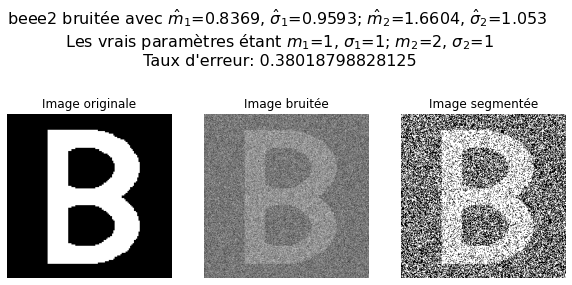

In [365]:
nb_iterEM = 200
var=aveugle_non_super_2classes('./images/beee2.bmp',1,1,2,1,nb_iterEM)

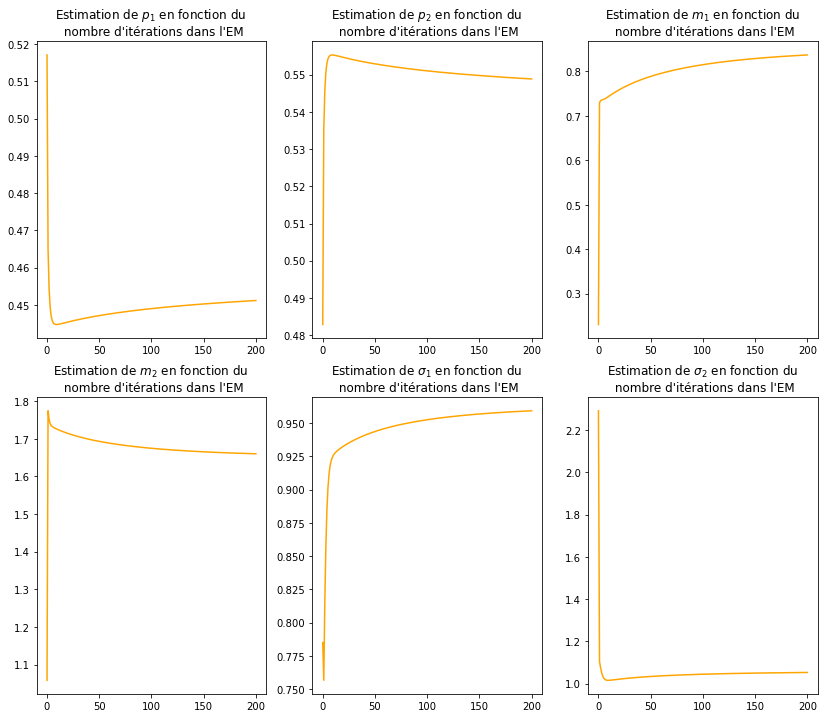

In [366]:
x=np.arange(nb_iterEM+1)
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(14,12))
axes[0,0].plot(x,var['p1_est'],color='orange')
axes[0,0].set_title("Estimation de $p_1$ en fonction du \n nombre d'itérations dans l'EM")
axes[0,1].plot(x,var['p2_est'],color='orange')
axes[0,1].set_title("Estimation de $p_2$ en fonction du \n nombre d'itérations dans l'EM")
axes[0,2].plot(x,var['m1_est'],color='orange')
axes[0,2].set_title("Estimation de $m_1$ en fonction du \n nombre d'itérations dans l'EM")
axes[1,0].plot(x,var['m2_est'],color='orange')
axes[1,0].set_title("Estimation de $m_2$ en fonction du \n nombre d'itérations dans l'EM")
axes[1,1].plot(x,var['sig1_est'],color='orange')
axes[1,1].set_title("Estimation de $\sigma_1$ en fonction du \n nombre d'itérations dans l'EM")
axes[1,2].plot(x,var['sig2_est'],color='orange')
axes[1,2].set_title("Estimation de $\sigma_2$ en fonction du \n nombre d'itérations dans l'EM")
plt.show()

Montrons que l'algorithme EM dépend fortement de l'initialisation. Pour se faire, nous pouvons initialiser notre algorithme avec un paramètre $\theta^0$ de plus en plus éloigné de la réalité. Comme nous avons la connaissance de $\theta^{\text{réel}}$, cela nous aide un peu. Voici les résultats de l'algorithme EM selon l'initialisation précisée dans le titre: 

en croisant les doigts pour tomber sur l'initialisation qui nous donne la convergence vers le maximum global de la vraissemblance. L'autre solution étant d'initialiser notre paramètre grâce à l'implémentation d'un algorithme K-Means nous permettant d'obtenir une estimation grossière de $\theta$ mais qui fonctionnera parfaitement comme initialisation de l'algorithme EM. 

## Affichons les segmentations de l'image bruitée **beee2.bmp** par tous les bruits sur le même graphique

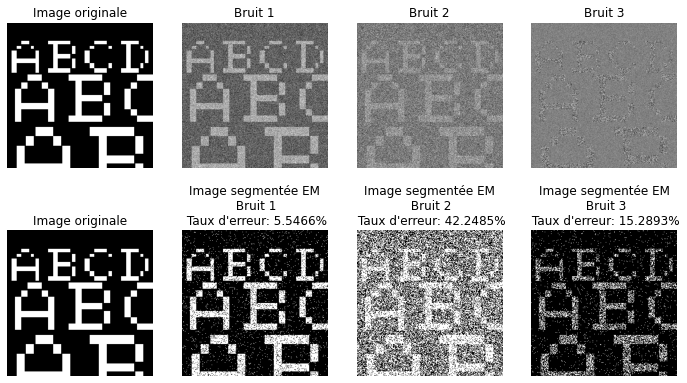

In [350]:
m1=[1,1,1]
sig1=[1,1,1]
m2=[4,2,1]
sig2=[1,1,3]
chemin_image = './images/alfa2.bmp'
nb_iterEM = 300

X, m, n = lit_image(chemin_image)
cl1, cl2 = identif_classes(X)
Y1=bruit_gauss(X,m,n,cl1,cl2,m1[0],sig1[0],m2[0],sig2[0])
Y2=bruit_gauss(X,m,n,cl1,cl2,m1[1],sig1[1],m2[1],sig2[1])
Y3=bruit_gauss(X,m,n,cl1,cl2,m1[2],sig1[2],m2[2],sig2[2])

fig, axes = plt.subplots(2,4, figsize=(12,7))
axes[0,0].imshow(X, cmap='gray')
axes[0,0].set_title('Image originale')
axes[0,0].axis('off')
axes[0,1].imshow(Y1, cmap='gray')
axes[0,1].set_title('Bruit 1')
axes[0,1].axis('off')
axes[0,2].imshow(Y2, cmap='gray')
axes[0,2].set_title('Bruit 2')
axes[0,2].axis('off')
axes[0,3].imshow(Y3, cmap='gray')
axes[0,3].set_title('Bruit 3')
axes[0,3].axis('off')
axes[1,0].imshow(X, cmap='gray')
axes[1,0].set_title('Image originale')
axes[1,0].axis('off')
for j in range(3):
    y_predict,erreur = aveugle_non_super_2classes_predict(chemin_image, m1[j], sig1[j], m2[j], sig2[j], nb_iterEM)
    axes[1,j+1].imshow(y_predict, cmap='gray')
    axes[1,j+1].set_title('Image segmentée EM\n Bruit '+str(j+1)+"\n Taux d'erreur: "+str(round(np.mean(erreur*100),4))+'%')
    axes[1,j+1].axis('off')

## Partie SEM

In [367]:
def tirage_apost(Ppost, cl1, cl2, m, n): 
    return np.where(np.random.rand(m,n) < Ppost[:,:,0], cl1, cl2)

In [368]:
def calc_param_SEM(Y, m, n, cl1, cl2, p10, p20, m10, sig10, m20, sig20):
    Ppost = calc_probapost_Gauss(Y,m,n,p10,p20,m10,sig10,m20,sig20)

    X_est = tirage_apost(Ppost, cl1, cl2, m, n)
    
    # Estimation des paramètres
    # Paramètres de la prior
    p1_est = np.asarray([X_est==cl1]).sum()/(m*n)
    p2_est = np.asarray([X_est==cl2]).sum()/(m*n)
    
    # Paramètres des gaussiennes des conditional likelihood. 
    m1_est = (Y*np.asarray([X_est==cl1])).sum()/np.asarray([X_est==cl1]).sum()
    m2_est = (Y*np.asarray([X_est==cl2])).sum()/np.asarray([X_est==cl2]).sum()
    
    sig1_est = np.sqrt((((Y-m1_est)**2)*np.asarray([X_est==cl1])).sum()/np.asarray([X_est==cl1]).sum())
    sig2_est = np.sqrt((((Y-m2_est)**2)*np.asarray([X_est==cl2])).sum()/np.asarray([X_est==cl2]).sum())
    
    return p1_est, p2_est, m1_est, sig1_est, m2_est, sig2_est

In [369]:
def calc_SEM(Y,m,n,cl1,cl2,p10,p20,m10,sig10,m20,sig20,nb_iter):
    p1_est = p10
    p2_est = p20
    m1_est = m10
    sig1_est = sig10
    m2_est = m20
    sig2_est = sig20
    variables= pd.DataFrame(columns=["p1_est", "p2_est", "m1_est", "sig1_est", "m2_est", "sig2_est"])
    variables.loc[0]=[p1_est, p2_est, m1_est, sig1_est, m2_est, sig2_est]
    for i in range(nb_iterEM):
        p1_est, p2_est, m1_est, sig1_est, m2_est, sig2_est = calc_param_SEM(Y, m, n,cl1,cl2, p1_est, p2_est, m1_est, 
                                                                              sig1_est, m2_est, sig2_est)
        variables.loc[i+1]=[p1_est, p2_est, m1_est, sig1_est, m2_est, sig2_est]
        
    return p1_est, p2_est, m1_est, sig1_est, m2_est, sig2_est, variables

In [370]:
def aveugle_reelle_2classes(chemin_image, m1, sig1, m2, sig2, nb_iterEM):
    X, m, n = lit_image(chemin_image)
    erreur = np.zeros(100)
    cl1, cl2 = identif_classes(X)
    p1, p2 = calc_probaprio(X,m,n,cl1,cl2)
    Y=bruit_gauss(X,m,n,cl1,cl2,m1,sig1,m2,sig2)
    iter_KM = 100 
    
    # On réinitialise les paramètres car on ne les connaît pas dans la pratique. 
    p1 = 0; p2 = 0; m1 = 0; m2=0; sig1=0; sig2=0;
    
    # Partie K-Means
 
    p10, p20, m10, sig10, m20, sig20 = init_param(Y,cl1,cl2,iter_KM)

    # Partie SEM 

    print(p10, p20, m10, sig10, m20, sig20)
    p1_est, p2_est, m1_est, sig1_est, m2_est, sig2_est, variables = calc_SEM(Y, m, n, cl1, cl2,
                                                                           p10, 
                                                                           p20, 
                                                                           m10, sig10, 
                                                                           m20, sig20,
                                                                           nb_iterEM)    
    for i in range(100):
        y_segmented = MPM_Gauss(Y,cl1,cl2,p1_est,p2_est,m1_est,sig1_est,m2_est,sig2_est)
        erreur[i]=taux_erreur(X,y_segmented,m,n)
    fig, axes = plt.subplots(1,3, figsize=(10,4.5))
    axes[0].imshow(X, cmap='gray')
    axes[0].set_title('Image originale')
    axes[0].axis('off')
    axes[1].imshow(Y, cmap='gray')
    axes[1].set_title('Image bruitée')
    axes[1].axis('off')
    axes[2].set_title('Image segmentée')
    axes[2].axis('off')
    if erreur[-1]>0.5:
        y_segmented = 255 - y_segmented
        axes[2].set_title('Image segmentée en inversant\n les classes')
    erreur[erreur>0.5] = 1 - erreur[erreur>0.5]
    axes[2].imshow(y_segmented, cmap='gray')
                 
    fig.suptitle(chemin_image[9:-4] +' bruitée avec $\hat{m}_1$='+str(round(m1_est,4))+', $\hat{\sigma}_1$='+str(round(sig1_est,4))+'; $\hat{m}_2$='+str(round(m2_est,4))+', $\hat{\sigma}_2$='+str(round(sig2_est,4))+"\n Taux d'erreur: "+str(np.mean(erreur)), fontsize=16)
    #print("Taux d'erreur: "+str(np.mean(erreur))+"\n")
    return variables
    

In [371]:
def print_param_SEM(var):
    fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(14,12))
    axes[0,0].plot(x,var['p1_est'],color='orange')
    axes[0,0].set_title("Estimation de $p_1$ en fonction du \n nombre d'itérations dans le SEM")
    axes[0,1].plot(x,var['p2_est'],color='orange')
    axes[0,1].set_title("Estimation de $p_2$ en fonction du \n nombre d'itérations dans le SEM")
    axes[0,2].plot(x,var['m1_est'],color='orange')
    axes[0,2].set_title("Estimation de $m_1$ en fonction du \n nombre d'itérations dans le SEM")
    axes[1,0].plot(x,var['m2_est'],color='orange')
    axes[1,0].set_title("Estimation de $m_2$ en fonction du \n nombre d'itérations dans le SEM")
    axes[1,1].plot(x,var['sig1_est'],color='orange')
    axes[1,1].set_title("Estimation de $\sigma_1$ en fonction du \n nombre d'itérations dans le SEM")
    axes[1,2].plot(x,var['sig2_est'],color='orange')
    axes[1,2].set_title("Estimation de $\sigma_2$ en fonction du \n nombre d'itérations dans le SEM")
    plt.show()

In [383]:
def aveugle_reelle_2classes_predict(chemin_image, m1, sig1, m2, sig2, nb_iterEM):
    X, m, n = lit_image(chemin_image)
    cl1, cl2 = identif_classes(X)
    p1, p2 = calc_probaprio(X,m,n,cl1,cl2)
    Y=bruit_gauss(X,m,n,cl1,cl2,m1,sig1,m2,sig2)
    erreur = np.zeros(1000)
    iter_KM = 100
    
    # On réinitialise les paramètres car on ne les connaît pas dans la pratique. 
    p1 = 0; p2 = 0; m1 = 0; m2=0; sig1=0; sig2=0;
    
    # Partie K-Means
 
    p10, p20, m10, sig10, m20, sig20 = init_param(Y,cl1,cl2,iter_KM)

    # Partie SEM 
    
    p1_est, p2_est, m1_est, sig1_est, m2_est, sig2_est, variables = calc_SEM(Y, m, n, cl1, cl2,
                                                                           p10, 
                                                                           p20, 
                                                                           m10, sig10, 
                                                                           m20, sig20,
                                                                           nb_iterEM) 
    for i in range(1000):
        y_segmented = MPM_Gauss(Y,cl1,cl2,p1_est,p2_est,m1_est,sig1_est,m2_est,sig2_est)
        erreur[i]=taux_erreur(X,y_segmented,m,n)
    if erreur[-1]>0.5:
        y_segmented = 255 - y_segmented
    erreur[erreur>0.5] = 1 - erreur[erreur>0.5]

    return y_segmented, erreur

0.5174102783203125 0.4825897216796875 0.20767473569131523 0.7568442696630467 1.0356480441584794 2.2471929589859183


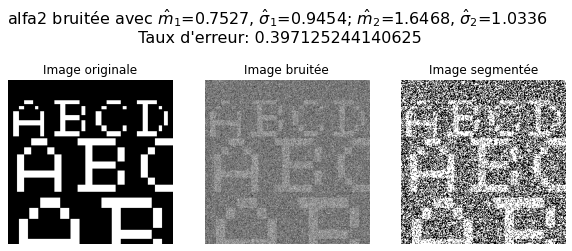

In [389]:
nb_iterEM = 300
m1=1
sig1=1
m2=2
sig2=1
var_SEM=aveugle_reelle_2classes('./images/alfa2.bmp',m1,sig1,m2,sig2,nb_iterEM)

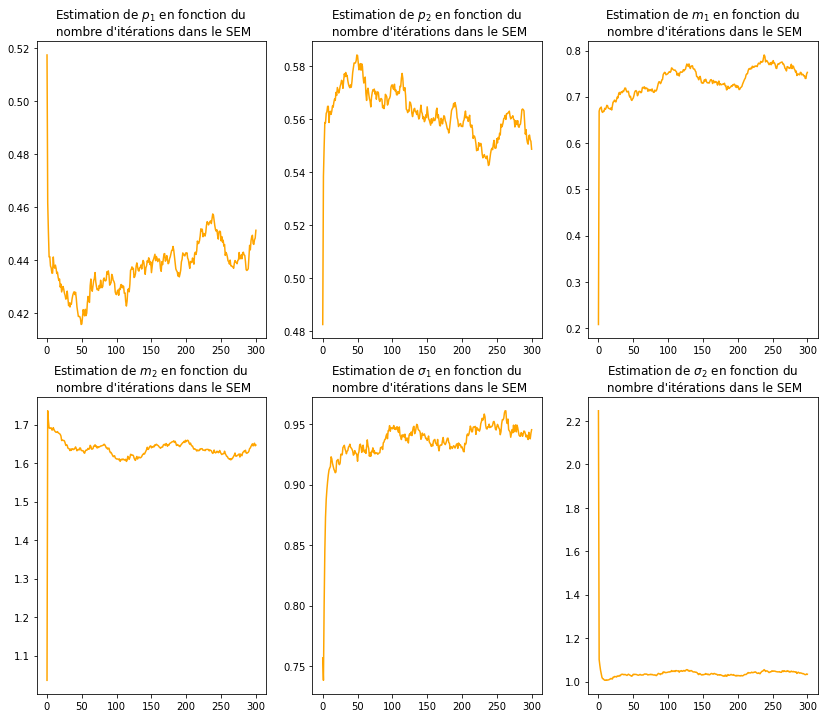

In [390]:
x=np.arange(nb_iterEM+1)
print_param_SEM(var_SEM)

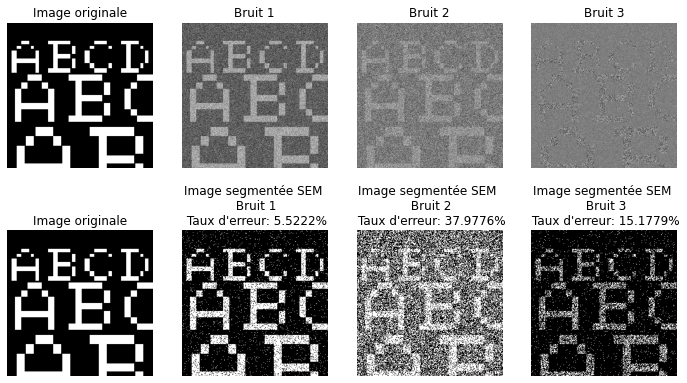

In [391]:
m1=[1,1,1]
sig1=[1,1,1]
m2=[4,2,1]
sig2=[1,1,3]
chemin_image = './images/alfa2.bmp'
nb_iterEM = 300

X, m, n = lit_image(chemin_image)
cl1, cl2 = identif_classes(X)
Y1=bruit_gauss(X,m,n,cl1,cl2,m1[0],sig1[0],m2[0],sig2[0])
Y2=bruit_gauss(X,m,n,cl1,cl2,m1[1],sig1[1],m2[1],sig2[1])
Y3=bruit_gauss(X,m,n,cl1,cl2,m1[2],sig1[2],m2[2],sig2[2])

fig, axes = plt.subplots(2,4, figsize=(12,7))
axes[0,0].imshow(X, cmap='gray')
axes[0,0].set_title('Image originale')
axes[0,0].axis('off')
axes[0,1].imshow(Y1, cmap='gray')
axes[0,1].set_title('Bruit 1')
axes[0,1].axis('off')
axes[0,2].imshow(Y2, cmap='gray')
axes[0,2].set_title('Bruit 2')
axes[0,2].axis('off')
axes[0,3].imshow(Y3, cmap='gray')
axes[0,3].set_title('Bruit 3')
axes[0,3].axis('off')
axes[1,0].imshow(X, cmap='gray')
axes[1,0].set_title('Image originale')
axes[1,0].axis('off')
for j in range(3):
    y_predict,erreur = aveugle_reelle_2classes_predict(chemin_image, m1[j], sig1[j], m2[j], sig2[j], nb_iterEM)
    axes[1,j+1].imshow(y_predict, cmap='gray')
    axes[1,j+1].set_title('Image segmentée SEM \n Bruit '+str(j+1)+"\n Taux d'erreur: "+str(round(np.mean(erreur*100),4))+'%')
    axes[1,j+1].axis('off')

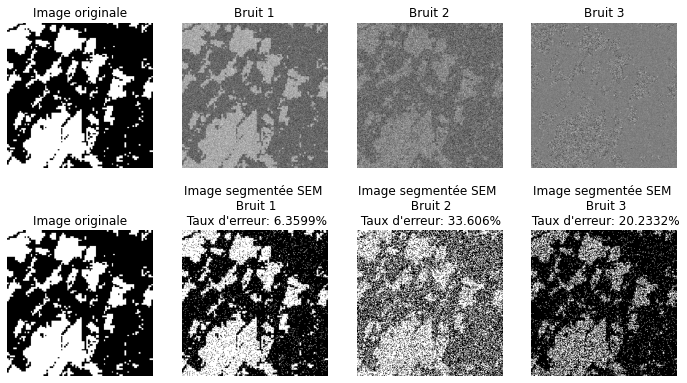

In [386]:
m1=[1,1,1]
sig1=[1,1,1]
m2=[4,2,1]
sig2=[1,1,3]
chemin_image = './images/country2.bmp'
nb_iterEM = 300

X, m, n = lit_image(chemin_image)
cl1, cl2 = identif_classes(X)
Y1=bruit_gauss(X,m,n,cl1,cl2,m1[0],sig1[0],m2[0],sig2[0])
Y2=bruit_gauss(X,m,n,cl1,cl2,m1[1],sig1[1],m2[1],sig2[1])
Y3=bruit_gauss(X,m,n,cl1,cl2,m1[2],sig1[2],m2[2],sig2[2])

fig, axes = plt.subplots(2,4, figsize=(12,7))
axes[0,0].imshow(X, cmap='gray')
axes[0,0].set_title('Image originale')
axes[0,0].axis('off')
axes[0,1].imshow(Y1, cmap='gray')
axes[0,1].set_title('Bruit 1')
axes[0,1].axis('off')
axes[0,2].imshow(Y2, cmap='gray')
axes[0,2].set_title('Bruit 2')
axes[0,2].axis('off')
axes[0,3].imshow(Y3, cmap='gray')
axes[0,3].set_title('Bruit 3')
axes[0,3].axis('off')
axes[1,0].imshow(X, cmap='gray')
axes[1,0].set_title('Image originale')
axes[1,0].axis('off')
for j in range(3):
    y_predict,erreur = aveugle_reelle_2classes_predict(chemin_image, m1[j], sig1[j], m2[j], sig2[j], nb_iterEM)
    axes[1,j+1].imshow(y_predict, cmap='gray')
    axes[1,j+1].set_title('Image segmentée SEM \n Bruit '+str(j+1)+"\n Taux d'erreur: "+str(round(np.mean(erreur*100),4))+'%')
    axes[1,j+1].axis('off')

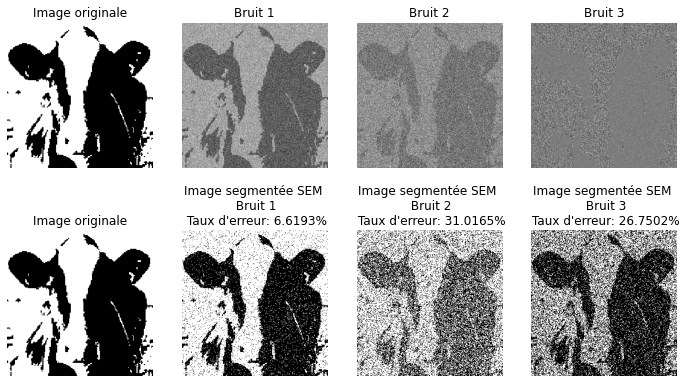

In [387]:
m1=[1,1,1]
sig1=[1,1,1]
m2=[4,2,1]
sig2=[1,1,3]
chemin_image = './images/veau2.bmp'
nb_iterEM = 300

X, m, n = lit_image(chemin_image)
cl1, cl2 = identif_classes(X)
Y1=bruit_gauss(X,m,n,cl1,cl2,m1[0],sig1[0],m2[0],sig2[0])
Y2=bruit_gauss(X,m,n,cl1,cl2,m1[1],sig1[1],m2[1],sig2[1])
Y3=bruit_gauss(X,m,n,cl1,cl2,m1[2],sig1[2],m2[2],sig2[2])

fig, axes = plt.subplots(2,4, figsize=(12,7))
axes[0,0].imshow(X, cmap='gray')
axes[0,0].set_title('Image originale')
axes[0,0].axis('off')
axes[0,1].imshow(Y1, cmap='gray')
axes[0,1].set_title('Bruit 1')
axes[0,1].axis('off')
axes[0,2].imshow(Y2, cmap='gray')
axes[0,2].set_title('Bruit 2')
axes[0,2].axis('off')
axes[0,3].imshow(Y3, cmap='gray')
axes[0,3].set_title('Bruit 3')
axes[0,3].axis('off')
axes[1,0].imshow(X, cmap='gray')
axes[1,0].set_title('Image originale')
axes[1,0].axis('off')
for j in range(3):
    y_predict,erreur = aveugle_reelle_2classes_predict(chemin_image, m1[j], sig1[j], m2[j], sig2[j], nb_iterEM)
    axes[1,j+1].imshow(y_predict, cmap='gray')
    axes[1,j+1].set_title('Image segmentée SEM \n Bruit '+str(j+1)+"\n Taux d'erreur: "+str(round(np.mean(erreur*100),4))+'%')
    axes[1,j+1].axis('off')

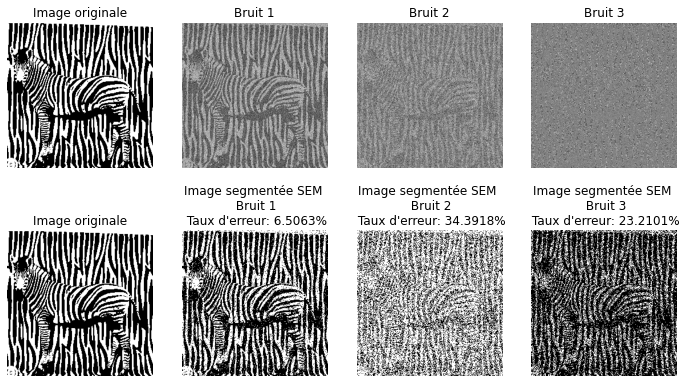

In [388]:
m1=[1,1,1]
sig1=[1,1,1]
m2=[4,2,1]
sig2=[1,1,3]
chemin_image = './images/zebre2.bmp'
nb_iterEM = 300

X, m, n = lit_image(chemin_image)
cl1, cl2 = identif_classes(X)
Y1=bruit_gauss(X,m,n,cl1,cl2,m1[0],sig1[0],m2[0],sig2[0])
Y2=bruit_gauss(X,m,n,cl1,cl2,m1[1],sig1[1],m2[1],sig2[1])
Y3=bruit_gauss(X,m,n,cl1,cl2,m1[2],sig1[2],m2[2],sig2[2])

fig, axes = plt.subplots(2,4, figsize=(12,7))
axes[0,0].imshow(X, cmap='gray')
axes[0,0].set_title('Image originale')
axes[0,0].axis('off')
axes[0,1].imshow(Y1, cmap='gray')
axes[0,1].set_title('Bruit 1')
axes[0,1].axis('off')
axes[0,2].imshow(Y2, cmap='gray')
axes[0,2].set_title('Bruit 2')
axes[0,2].axis('off')
axes[0,3].imshow(Y3, cmap='gray')
axes[0,3].set_title('Bruit 3')
axes[0,3].axis('off')
axes[1,0].imshow(X, cmap='gray')
axes[1,0].set_title('Image originale')
axes[1,0].axis('off')
for j in range(3):
    y_predict,erreur = aveugle_reelle_2classes_predict(chemin_image, m1[j], sig1[j], m2[j], sig2[j], nb_iterEM)
    axes[1,j+1].imshow(y_predict, cmap='gray')
    axes[1,j+1].set_title('Image segmentée SEM \n Bruit '+str(j+1)+"\n Taux d'erreur: "+str(round(np.mean(erreur*100),4))+'%')
    axes[1,j+1].axis('off')

Text(0.5, 1.0, 'Moi en BW')

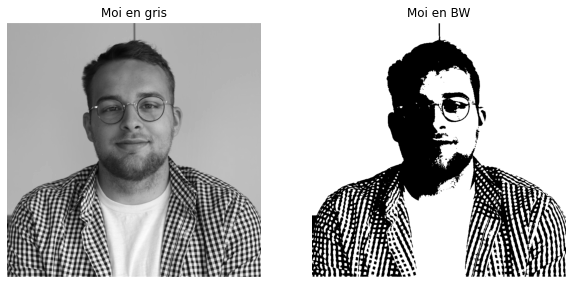

In [419]:
moi, m, n = lit_image('images/moi.jpeg')
moi_bw=moi.copy()
moi_bw[moi>=127]=255
moi_bw[moi<127]=0
fig,axes = plt.subplots(1,2,figsize=(10,10))
axes[0].imshow(moi, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Moi en gris')
axes[1].imshow(moi_bw, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Moi en BW')

In [420]:
def aveugle_reelle_2classes_image(image,m,n, m1, sig1, m2, sig2, nb_iterEM):
    X = image
    erreur = np.zeros(100)
    cl1, cl2 = identif_classes(X)
    p1, p2 = calc_probaprio(X,m,n,cl1,cl2)
    Y=bruit_gauss(X,m,n,cl1,cl2,m1,sig1,m2,sig2)
    iter_KM = 100 
    
    # On réinitialise les paramètres car on ne les connaît pas dans la pratique. 
    p1 = 0; p2 = 0; m1 = 0; m2=0; sig1=0; sig2=0;
    
    # Partie K-Means
 
    p10, p20, m10, sig10, m20, sig20 = init_param(Y,cl1,cl2,iter_KM)

    # Partie SEM 

    print(p10, p20, m10, sig10, m20, sig20)
    p1_est, p2_est, m1_est, sig1_est, m2_est, sig2_est, variables = calc_SEM(Y, m, n, cl1, cl2,
                                                                           p10, 
                                                                           p20, 
                                                                           m10, sig10, 
                                                                           m20, sig20,
                                                                           nb_iterEM)    
    for i in range(100):
        y_segmented = MPM_Gauss(Y,cl1,cl2,p1_est,p2_est,m1_est,sig1_est,m2_est,sig2_est)
        erreur[i]=taux_erreur(X,y_segmented,m,n)
    fig, axes = plt.subplots(1,3, figsize=(10,4.5))
    axes[0].imshow(X, cmap='gray')
    axes[0].set_title('Image originale')
    axes[0].axis('off')
    axes[1].imshow(Y, cmap='gray')
    axes[1].set_title('Image bruitée')
    axes[1].axis('off')
    axes[2].set_title('Image segmentée')
    axes[2].axis('off')
    if erreur[-1]>0.5:
        y_segmented = 255 - y_segmented
        axes[2].set_title('Image segmentée en inversant\n les classes')
    erreur[erreur>0.5] = 1 - erreur[erreur>0.5]
    axes[2].imshow(y_segmented, cmap='gray')
                 
    fig.suptitle(chemin_image[9:-4] +' bruitée avec $\hat{m}_1$='+str(round(m1_est,4))+', $\hat{\sigma}_1$='+str(round(sig1_est,4))+'; $\hat{m}_2$='+str(round(m2_est,4))+', $\hat{\sigma}_2$='+str(round(sig2_est,4))+"\n Taux d'erreur: "+str(np.mean(erreur)), fontsize=16)
    #print("Taux d'erreur: "+str(np.mean(erreur))+"\n")
    return variables

0.3390125 0.6609875 0.3778987139027373 1.4736515391910874 2.739819137673201 4.234742158731479


,p1_est,p2_est,m1_est,sig1_est,m2_est,sig2_est
0,0.339012,0.660987,0.377899,1.473652,2.739819,4.234742
1,0.241347,0.758653,1.573325,1.356389,3.609029,1.482231
2,0.239536,0.760464,1.392599,1.440337,3.661107,1.373792
3,0.245177,0.754823,1.258472,1.395484,3.721625,1.296764
4,0.254163,0.745838,1.158405,1.304302,3.785402,1.230332
...,...,...,...,...,...,...
296,0.295745,0.704255,1.007043,1.003341,4.004076,0.997710
297,0.295655,0.704345,1.005579,1.001655,4.004305,0.997155
298,0.295498,0.704502,1.004996,1.001543,4.003885,0.997467
299,0.295247,0.704753,1.004256,1.001251,4.003124,0.998268


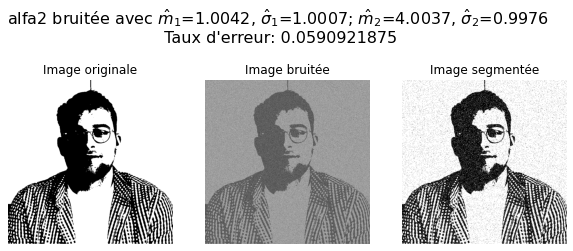

In [422]:
m1=[1,1,1]
sig1=[1,1,1]
m2=[4,2,1]
sig2=[1,1,3]
nb_iterEM = 300

aveugle_reelle_2classes_image(moi_bw, m, n, m1[0], sig1[0], m2[0], sig2[0], nb_iterEM)